In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import scipy.stats
import requests
import csv
from datetime import datetime

from scipy.signal import butter, filtfilt, find_peaks

# Defining the API URL
api_url = "https://v1.nocodeapi.com/fintastic/fit/YwfrSRHvmFPemKCR/aggregatesDatasets?dataTypeName=calories_expended&timePeriod=30days&durationTime=daily"  # Replace with the actual API URL
response = requests.get(api_url)

# Parsing the JSON data from the response
data = response.json()

# Creating a DataFrame from the 'calories_expended' data
df_1 = pd.DataFrame(data['calories_expended'])

df_1.head(30)

,value,startTimeMillis,endTimeMillis,startTime,endTime
0,1738,1697253869761,1697340269761,14 Oct 2023 03:24 am,15 Oct 2023 03:24 am
1,1660,1697340269761,1697426669761,15 Oct 2023 03:24 am,16 Oct 2023 03:24 am
2,1640,1697426669761,1697513069761,16 Oct 2023 03:24 am,17 Oct 2023 03:24 am
3,1640,1697513069761,1697599469761,17 Oct 2023 03:24 am,18 Oct 2023 03:24 am
4,1645,1697599469761,1697685869761,18 Oct 2023 03:24 am,19 Oct 2023 03:24 am
5,1640,1697685869761,1697772269761,19 Oct 2023 03:24 am,20 Oct 2023 03:24 am
6,1648,1697772269761,1697858669761,20 Oct 2023 03:24 am,21 Oct 2023 03:24 am
7,1640,1697858669761,1697945069761,21 Oct 2023 03:24 am,22 Oct 2023 03:24 am
8,1640,1697945069761,1698031469761,22 Oct 2023 03:24 am,23 Oct 2023 03:24 am
9,1659,1698031469761,1698117869761,23 Oct 2023 03:24 am,24 Oct 2023 03:24 am


In [2]:
# Extracting 'value' column from df_1
calories_out = df_1['value']

# Creating a DataFrame 'x' with a column named 'float_column' from df_1['startTimeMillis']
data = {'float_column': df_1['startTimeMillis']}
date = pd.DataFrame(data)

# Converting 'float_column' to string
date['float_column'] = date['float_column'].astype(str)

# Converting 'float_column' to datetime format
date['float_column'] = pd.to_datetime(date['float_column'], unit='ms')

# Formatting 'float_column' to a specific date string format
date['float_column'] = date['float_column'].dt.strftime('%Y-%m-%d')

# Displaying the first 5 rows
date.head(35)

,float_column
0,2023-10-14
1,2023-10-15
2,2023-10-16
3,2023-10-17
4,2023-10-18
5,2023-10-19
6,2023-10-20
7,2023-10-21
8,2023-10-22
9,2023-10-23


In [3]:
data_1 = {'Date': date['float_column'],
        'Burned Calories': df_1['value']}

# Creating a DataFrame
df_1_new = pd.DataFrame(data_1)

# Displaying the first 5 rows
df_1_new.head(35)

,Date,Burned Calories
0,2023-10-14,1738
1,2023-10-15,1660
2,2023-10-16,1640
3,2023-10-17,1640
4,2023-10-18,1645
5,2023-10-19,1640
6,2023-10-20,1648
7,2023-10-21,1640
8,2023-10-22,1640
9,2023-10-23,1659


In [4]:
file_path = r"C:\Users\ruben\OneDrive\Schoolzaken\Hogeschool Fontys 2023-2024\FINNTASTIC\Nutrition Data\Nutrition-Summary-2023-09-18-to-2023-11-13.csv"
# Read the CSV file into a DataFrame
df_2 = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
df_2.head()


,Date,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
0,2023-09-20,Breakfast,421.5,13.7,2.7,0.1,0.0,0.0,0.0,38.3,422.4,62.0,5.4,20.9,16.5,5.0,17.1,0.6,1.7,NaN
1,2023-09-20,Dinner,767.0,27.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.6,0.0,0.0,50.6,0.0,0.0,0.0,0.0,NaN
2,2023-09-20,Lunch,1183.0,54.6,5.4,11.0,0.0,0.0,0.0,0.6,0.0,129.6,12.8,13.5,47.8,0.0,0.0,0.0,0.0,NaN
3,2023-09-20,Snacks,1242.8,67.5,14.0,0.0,0.0,0.3,12.2,128.0,684.4,73.9,6.6,27.3,91.3,0.0,116.2,316.0,15.1,NaN
4,2023-09-21,Breakfast,374.5,12.4,2.0,0.0,0.0,0.0,0.0,36.8,0.0,55.2,3.9,6.0,14.3,0.0,0.0,0.0,0.0,NaN


In [5]:
calories_in = df_2.rename(columns={'Calories': 'Consumed Calories'}, inplace=True)

daily_sum = df_2.groupby(['Date'])['Consumed Calories'].sum().reset_index()

# Creating a DataFrame
df_2_new = pd.DataFrame(daily_sum)

# Displaying the first 5 rows
df_2_new.tail()


,Date,Consumed Calories
28,2023-11-06,2704.0
29,2023-11-08,3055.6
30,2023-11-09,3262.5
31,2023-11-10,3411.3
32,2023-11-12,3576.6


In [6]:
# Merge dataframes on 'Date' column
merged_df = pd.merge(df_1_new, df_2_new, on='Date', how='left')

# Fill NaN values with 0 if no extended calories for a particular date
merged_df['Consumed Calories'].fillna(0, inplace=True)

# Calculate total calories by adding consumed and extended calories
merged_df['Gained Calories'] = merged_df['Consumed Calories'] - merged_df['Burned Calories']

# Displaying the first 5 rows
merged_df.head(30)

,Date,Burned Calories,Consumed Calories,Gained Calories
0,2023-10-14,1738,0.0,-1738.0
1,2023-10-15,1660,0.0,-1660.0
2,2023-10-16,1640,0.0,-1640.0
3,2023-10-17,1640,0.0,-1640.0
4,2023-10-18,1645,0.0,-1645.0
5,2023-10-19,1640,0.0,-1640.0
6,2023-10-20,1648,0.0,-1648.0
7,2023-10-21,1640,0.0,-1640.0
8,2023-10-22,1640,0.0,-1640.0
9,2023-10-23,1659,0.0,-1659.0


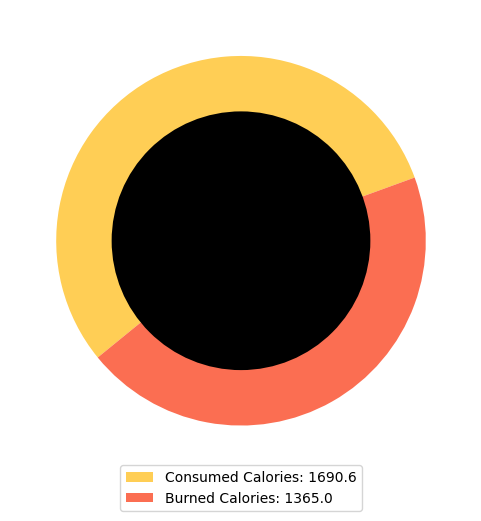

In [7]:
import matplotlib.pyplot as plt

# Calculate the values for the ring chart
burned_calories = merged_df['Burned Calories'].iloc[-1]  # Access the last value
consumed_calories = merged_df['Consumed Calories'].iloc[-1]  # Access the last value

# Calculate net calories (Consumed Calories - Burned Calories)
net_calories = max(0, consumed_calories - burned_calories)

# Create a figure and set the figure size
plt.figure(figsize=(6, 6), facecolor='none')

# Colors for the ring chart segments
colors = ['#FFCE55', '#FB6E52']

# Labels for the ring chart segments
labels = ['Consumed Calories: {:.1f}'.format(net_calories), 'Burned Calories: {:.1f}'.format(burned_calories)]

label_properties = {'fontsize': 12, 'fontweight': 'bold', 'color': 'white'}

# Explode the second segment (Burned Calories)
explode = (0, 0)  # You can adjust the explosion factor as needed

# Create a pie chart with customized labels
plt.pie([net_calories, burned_calories], colors=colors, startangle=20, pctdistance=0.2, explode=explode)

plt.legend(labels=labels,
          loc="lower center",
          bbox_to_anchor=(0.5,-0.1))

# Draw a circle in the center to create a ring chart
center_circle = plt.Circle((0, 0), 0.70, fc='black')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Show the plot
plt.show()


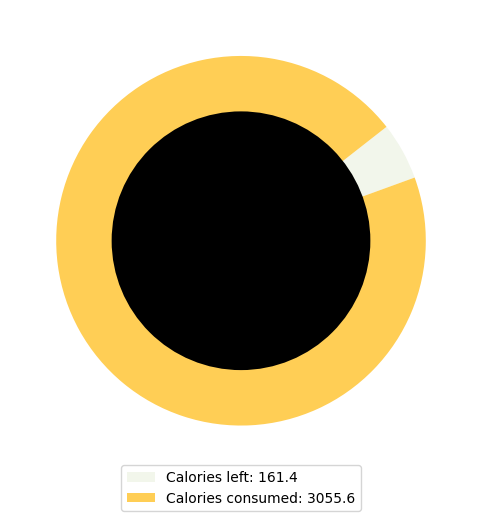

In [8]:
import matplotlib.pyplot as plt

# Calculate the values for the ring chart
goal_calories_in = 3217
consumed_calories = merged_df['Consumed Calories'].iloc[-1]  # Access the last value

# Calculate net calories (Consumed Calories - Burned Calories)
net_calories_in = max(0, goal_calories_in - consumed_calories)

# Create a figure and set the figure size
plt.figure(figsize=(6, 6), facecolor='none')

# Colors for the ring chart segments
colors = ['#F2F6EB', '#FFCE55']  # Corrected the color code

# Labels for the ring chart segments
labels = ['Calories left: {:.1f}'.format(net_calories_in), 'Calories consumed: {:.1f}'.format(consumed_calories)]

# Explode the second segment (Burned Calories)
explode = (0, 0)  # You can adjust the explosion factor as needed

# Create a pie chart with customized labels
plt.pie([net_calories_in, consumed_calories], colors=colors, startangle=20, pctdistance=0.2, explode=explode)

plt.legend(labels=labels,
          loc="lower center",
          bbox_to_anchor=(0.5,-0.1))

# Draw a circle in the center to create a ring chart
center_circle = plt.Circle((0, 0), 0.70, fc='black')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Show the plot
plt.show()


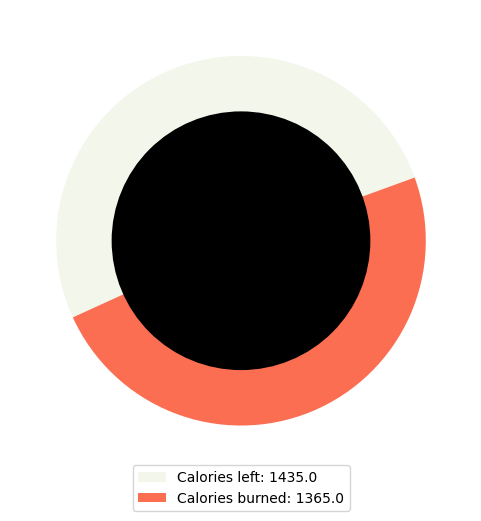

In [9]:
import matplotlib.pyplot as plt

# Calculate the values for the ring chart
goal_calories_out = 2800
burned_calories = merged_df['Burned Calories'].iloc[-1]  # Access the last value

# Calculate net calories (Consumed Calories - Burned Calories)
net_calories_out = goal_calories_out - burned_calories 

# Create a figure and set the figure size
plt.figure(figsize=(6, 6), facecolor='none')

# Colors for the ring chart segments
colors = ['#F2F6EB', '#FB6E52']

# Labels for the ring chart segments
labels = ['Calories left: {:.1f}'.format(net_calories_out), 'Calories burned: {:.1f}'.format(burned_calories)]

# Explode the second segment (Burned Calories)
explode = (0, 0)  # You can adjust the explosion factor as needed

# Create a pie chart with customized labels
plt.pie([net_calories_out, burned_calories], colors=colors, startangle=20, pctdistance=0.2, explode=explode)

plt.legend(labels=labels,
          loc="lower center",
          bbox_to_anchor=(0.5,-0.1))


# Draw a circle in the center to create a ring chart
center_circle = plt.Circle((0, 0), 0.70, fc='black')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Show the plot
plt.show()